# **Qutrits and the Deutsch-Jozsa Algorithm**

Authors:
- Lakshay Goel (goel67@purdue.edu)
- Kovid Tandon (tandon34@purdue.edu)
- Anderson Xu (xu1464@purdue.edu)
- Yi Lin Yang (yang2501@purdue.edu)

## **Qubits and Qutrits**

In the realm of quantum computing, both qubits and qutrits serve as fundamental units of information, but they exhibit distinct properties. Qubits, representing quantum bits, are the cornerstone of quantum computation and can exist in superpositions of two states, typically denoted as |0⟩ and |1⟩. This duality enables qubits to encode and process information in ways fundamentally different from classical bits. Conversely, qutrits extend this concept by introducing a broader spectrum of states; they can exist in superpositions of three states, typically denoted as |0⟩, |1⟩, and |2⟩. This expanded state space offers potential advantages in certain computational tasks, such as improved gate decompositions or increased computational capacity. Our goal now is to broaden our understanding of qutrits by extending the Deutsch-Jozsa algorithm from qubits to qutrits, and analyzing if this simple algorithm can be generalized for higher-dimensional systems like qutrits.






## **Introduction to the Deutsch-Jozsa algorithm**

The Deutsch-Jozsa algorithm, developed by David Deutsch and Richard Jozsa in 1992, emerged from the quest to explore the power of quantum computing. Motivated by the desire to understand the fundamental differences between classical and quantum computing paradigms, Deutsch and Jozsa aimed to devise a problem for which a quantum computer could outperform classical methods. Their algorithm tackles the task of determining whether a given function is constant or balanced, with the objective of showcasing quantum computing's ability to solve certain problems exponentially faster than classical approaches. The algorithm achieves this by leveraging quantum superposition, entanglement and interference to evaluate the function in a single step, providing a remarkable speedup with a time complexity of $O(1)$ compared to classical methods which typically have a time complexity of $O(2^n)$.

## **How does the Deutsch-Jozsa algorithm work? (Qubits)**




Let's break down the Deutsch-Jozsa algorithm into its key steps

Initially, the algorithm prepares the quantum system in a superposition of all possible inputs. For example, if the function takes $n$ bits as input, the quantum system is prepared in a superposition of $2^n$ states. The first $n-1$ qubits are set to $|0\rangle$, while the final qubit is set to $|1\rangle$. The superposition is then achieved by applying a Hadamard gate on all the qubits, leading to the following superposition, with $x$ running over all $n$ bit strings.



$$ \frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^n-1} |x\rangle (|0\rangle - |1\rangle) $$


The quantum oracle representing the given function is applied to the superposition of inputs. This oracle is a black box that computes the function, but importantly, it does so in a reversible manner. In other words, the function should be represented by a unitary operator that preserves the quantum state's reversibility. In our case, we understand the effect of the oracle. The oracle maps its input state $|x\rangle |y\rangle $ to $|x\rangle |y\oplus f(x)\rangle$, where $\oplus$ denotes addition modulo 2. Basically, the oracle implements an operation that flips the state of a qubit conditionally based on the value of a function f(x). Applying the oracle to the above superposition gives:


$$\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^n-1} |x\rangle \left( |0 \oplus f(x)\rangle - |1 \oplus f(x)\rangle \right)$$



Here's where the quantum magic happens. The oracle's action on this superposition state leads to constructive or destructive interference when measuring the ∣x⟩ qubits, which is the basis for the algorithm's quantum speedup. Interference can amplify or cancel out certain paths in the quantum state space. Since for every $x$, $f(x)$ can equal either 1 or 0, the above equation can be simplified to:



$$\frac{1}{\sqrt{2^{n+1}}} \sum_{x=0}^{2^n-1} (-1)^{f(x)}|x\rangle(|0\rangle - |1\rangle)$$

Which, when removing the final qubit set to $|x\rangle$ can be further simplified to:



$$\frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)}|x\rangle
$$

A final Hadamard gate is applied to every qubit initially set to $|0⟩$:

$$H^{\otimes n} |k\rangle = \frac{1}{\sqrt{2^n}} \sum_{j=0}^{2^n-1} (-1)^{k⋅j}|j\rangle
$$

Here, ${k⋅j}$ is the sum of the bitwise product

This leads to the final quantum state that will be measured. The following equation describes the probability of the final state being only $|0⟩$'s:

$$\left| \frac{1}{2^{n}} \sum_{x=0}^{2^n-1} (-1)^{f(x)} \right|^2$$

If the function is constant (i.e., it returns the same value for all inputs), the interference effects will cause the measurement to collapse to a single outcome with certainty. If the function is balanced (i.e., it returns half of the possible values as 0 and half as 1), the interference effects will cause the measurement to collapse to a random outcome. The above equation evaluates to 1 if and only if the final state is all 0's, indicating a constant function.



## **Coding the qubit implementation of Deutsch-Jozsa**

The following figure is a circuit representation of the Deutsh-Jozsa algorithm:

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

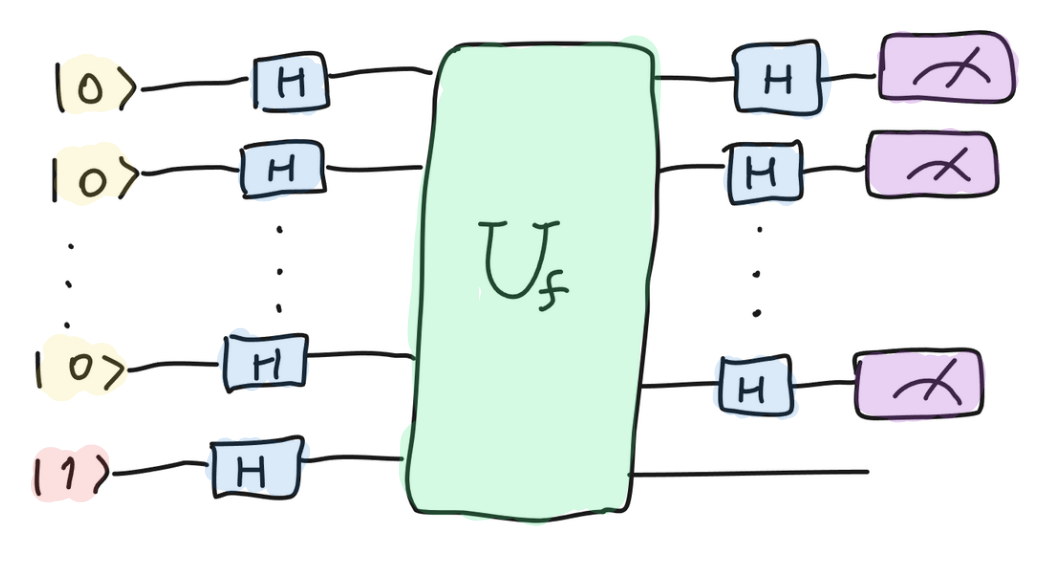

In [ ]:
Image('Screenshot_2024-01-29_213651.png', width = 525)

The circuit can be used as a guide towards writing the program. We will first code the Deutsch-Jozsa algorithm using qubits before generalizing it to qutrits to get a basic understanding of how the algorithm works.

In [ ]:

# Downloading and importing all necessary libraries
!pip install pennylane pennylane-qiskit
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


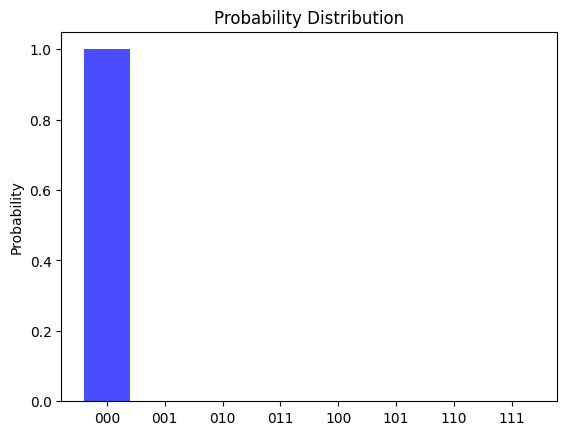

In [ ]:

# Defining the quantum device with n+1 qubits
n = 3
dev = qml.device("default.qubit", wires = n+1)

# Defining the Deutsch-Jozsa algorithm
@qml.qnode(dev)

def dj_algorithm(case, n):
    # Setting up the output qubit
    qml.PauliX(wires=n)
    qml.Hadamard(wires=n)

    # Setting up the input register
    for qubit in range(n):
        qml.Hadamard(wires=qubit)

    # Appending the oracle Uf
    if case == "balanced":
        b = np.random.randint(1, 2**n)
        b_str = format(b, '0'+str(n)+'b')

        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                qml.PauliX(wires=qubit)

        for qubit in range(n):
            qml.CNOT(wires=[qubit, n])

        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                qml.PauliX(wires=qubit)

    elif case == "constant":
        output = np.random.randint(2)
        if output == 1:
            qml.PauliX(wires=n)

    # Performing H-gates again and measuring
    for qubit in range(n):
        qml.Hadamard(wires=qubit)

    return qml.probs(wires=range(n))

# Runing the circuit
result = dj_algorithm('constant', n)

# Obtaining each input state
x_values = range(2**n)
input_states = [format(i, '0'+str(n)+'b') for i in x_values]

# Converting probabilities to a NumPy array for plotting
probabilities = np.array(result)

# Ploting the bar chart using numpy and matplotlib
plt.bar(input_states, probabilities, color='blue', alpha=0.7)
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()


With 3 qubits and a constant oracle, we are expected to get a probability of 1 at '000', indicating that there is a 0% chance of measuring '111'. The output above verifies our assumption; hence, verifying the constant function.

Now, let us rerun the program with a balanced oracle:

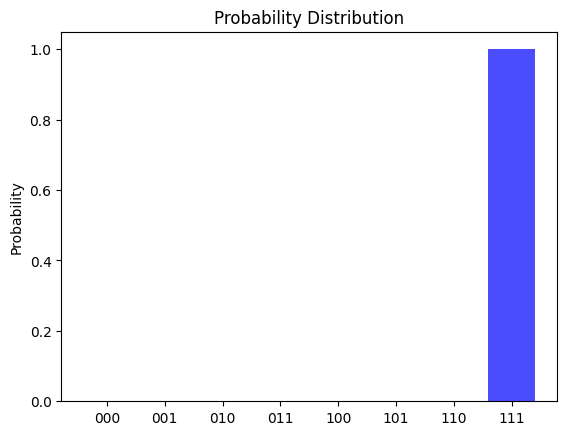

In [ ]:

# Defining the quantum device with n+1 qubits
n = 3
dev = qml.device("default.qubit", wires = n+1)

# Defining the Deutsch-Jozsa algorithm
@qml.qnode(dev)

def dj_algorithm(case, n):
    # Setting up the output qubit
    qml.PauliX(wires=n)
    qml.Hadamard(wires=n)

    # Setting up the input register
    for qubit in range(n):
        qml.Hadamard(wires=qubit)

    # Appending the oracle Uf
    if case == "balanced":
        b = np.random.randint(1, 2**n)
        b_str = format(b, '0'+str(n)+'b')

        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                qml.PauliX(wires=qubit)

        for qubit in range(n):
            qml.CNOT(wires=[qubit, n])

        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                qml.PauliX(wires=qubit)

    elif case == "constant":
        output = np.random.randint(2)
        if output == 1:
            qml.PauliX(wires=n)

    # Performing H-gates again and measuring
    for qubit in range(n):
        qml.Hadamard(wires=qubit)

    return qml.probs(wires=range(n))

# Runing the circuit
result = dj_algorithm('balanced', n)

# Obtaining each input state
x_values = range(2**n)
input_states = [format(i, '0'+str(n)+'b') for i in x_values]

# Converting probabilities to a NumPy array for plotting
probabilities = np.array(result)

# Ploting the bar chart using numpy and matplotlib
plt.bar(input_states, probabilities, color='blue', alpha=0.7)
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()


The program again correctly outputs the expected probability of 1 at '111' indicating that there is a 0% chance of obtaining a '000' when the function is balanced.

The algorithm can be run using any arbitrary number of qubits, and the resulting probabilites would always be same, with the only difference being the number of zeroes and ones in the input state.

## **Extending to Qutrits**

Now let us look at the Deutsch-Jozsa algorithm but for Qutrits:

Initially, the algorithm prepares the quantum system in a superposition of all possible inputs. When working with qubits, the function takes $n$  bits as input and the quantum system is prepared in a superposition of $2^n$  states. When working with qutrits,the function takes $n$ qutrits as an input and the quantum system is prepared in a superposition of $3^n$ states. The first  $n−1$  qubits are set to  $|0⟩$ , while the final qubit is set to $|2⟩$ . The superposition is then achieved by applying a Hadamard gate on all the qutrits.

Before we can understand the superposition, we must first understand how Hadamard gates extend to qutrits. The following equation represents a Hadamard gate for a qutrit:

$$H|\vec{x}⟩ = \frac{1}{\sqrt{3}} \sum_{\vec{z}=0}^{2}\limits e^{\frac{-i2\pi}{3}(\vec{x}\cdot\vec{z})}|\vec{z}⟩$$



The negative factor in the exponent is a phase shift, and since we are only concerned with the superposition of the quantum system, it can be ignored:

$$H|\vec{x}⟩ = \frac{1}{\sqrt{3}} \sum_{\vec{z}=0}^{2}\limits e^{\frac{i2\pi}{3}(\vec{x}\cdot \vec{z})}|\vec{z}⟩$$



The multiplication of two Hadamard Gates for qutrits can be expressed via the following equation:


$$H \otimes H|\vec{x}⟩ = \frac{1}{\sqrt{3^2}} \sum_{\vec{z_1},\vec{z_2} = 0}^{3^2 - 1}\limits e^{\frac{i2\pi}{3}(\vec{x_1}\cdot \vec{z_1} + \vec{x_2}\cdot \vec{z_2})}|\vec{z_1}\vec{z_2}⟩$$



Going forward we will write

$\vec{x_1}\cdot \vec{z_1} + \vec{x_2}\cdot \vec{z_2} + \dotsb + \vec{x_n}\cdot\vec{z_n}$ as $\bar{x}\cdot\bar{z}$.

$|\vec{z_1}\vec{z_1}\dotsm\vec{z_n}⟩$ as $|\bar{z}⟩$

and $\vec{z_1},\vec{z_1},\dotsc,\vec{z_n}$ as $\bar{z}$.

Thus with our new notation, the multipication of $n$ Hadamard Gates of qutrits can be represented as follows:

$$H^{\otimes n}|\vec{x}⟩ = \frac{1}{\sqrt{3^n}} \sum_{\bar{z} = 0}^{3^n - 1}\limits e^{\frac{i2\pi}{3}(\bar{x}\cdot \bar{z})}|\bar{z}⟩$$



We are now ready to see what the superposition of $n$ qutrits looks like, with $w = e^{\frac{i2\pi}{3}}$:

$$\frac{1}{\sqrt{3^n}} \sum_{\bar{z} = 0}^{3^n - 1}\limits w^{(\bar{x} \cdot \bar{z})}|\bar{z}⟩$$


Just like with qubits, we now apply the oracle and reach the following measurement state:

$$|\psi⟩ =  \frac{1}{3^n} \sum_{\bar{z} = 0}^{3^n-1} \sum_{\bar{x} = 0}^{3^n-1}w^{(\bar{x}\cdot\bar{z}) + f(\bar{x})}|\bar{z}⟩$$

With $f(x)$ representing the mapping that is either balanced or constant.

The above measurement state yields the following representation when $f(x)$ is constant:

$$|\psi⟩ = w^{f(0)}|0⟩$$

## **Coding the qutrit implementation of Deutsch-Jozsa**

Our primary goal is to extend the Deutsch-Jozsa algorithm to qutrits and analyze if it generalizes easily or not. A few key things to keep into consideration would be transitioning from base-2 to base-3 and a change in the number of possible states from $2^n$ to $3^n$.

Let's use the following circuit as a guide towards writing the code for our Deutsch-Jozsa implementation using qutrits:

In [ ]:
uploaded2 = uploaded = files.upload()

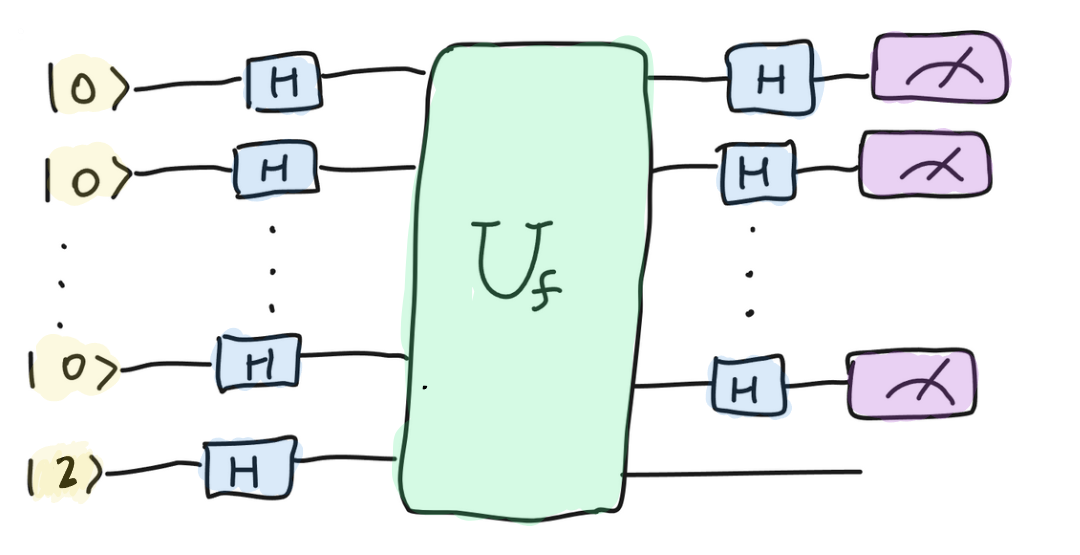

In [ ]:
Image('Screenshot 2024-01-30 063702 (1).png', width = 525)

The quantum gates also change when we are dealing with third dimensional systems. Fortunately, PennyLane provides us with most of the gates that we will be needing for implementing this algorithm using qutrits. The 'Hadamard' function changes to 'THadamard' and the 'PauliX' function changes to 'TShift'. For the qutrit CNOT gate, we define a custom unitary matrix, and this gives us everything we need to write the code.

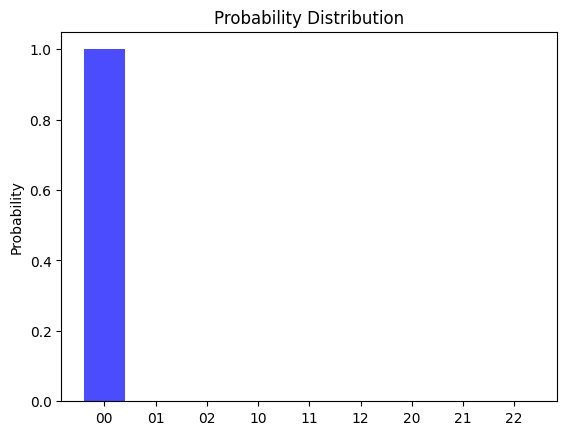

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

n = 2

# Define the quantum device with n+1 qutrits
dev = qml.device("default.qutrit", wires=n+1)

# CNOT gate for qutrits
cnot_qutrit = np.array     ([[1, 0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 1, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 1, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0, 1],
                             [0, 0, 0, 0, 0, 0, 1, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 0, 1, 0, 0, 0],
                             [0, 0, 0, 1, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 1, 0, 0, 0, 0]])

# Define the Deutsch-Jozsa algorithm in PennyLane
@qml.qnode(dev)
def dj_algorithm(case, n):
    # Set up the output qutrit
    qml.TShift(wires=n)
    qml.THadamard(wires=n)

    # Set up the input register
    for qutrit in range(n):
        qml.THadamard(wires=qutrit)

    # Append the oracle gate
    if case == "balanced":
        b = np.random.randint(1, 3**n)
        b_str = np.base_repr(b, base=3)

        for qutrit in range(len(b_str)):
            if (b_str[qutrit] == ('1')) or (b_str[qutrit] == ('2')):
                qml.TShift(wires=qutrit)

        for qutrit in range(n):
            qml.QutritUnitary(cnot_qutrit, wires = [qutrit, n])

        for qutrit in range(len(b_str)):
            if (b_str[qutrit] == ('1')) or (b_str[qutrit] == ('2')):
                qml.TShift(wires=qutrit)

    elif case == "constant":
        output = np.random.randint(2)
        if (output == 1) or (output == 2):
            qml.TShift(wires=n)

    # Perform H-gates again and measure
    for qutrit in range(n):
        qml.THadamard(wires=qutrit)

    return qml.probs(wires=range(n))

# Run the circuits
result = dj_algorithm('constant', n)

# Displaying the probabilities
states = [''.join(str((i // (3 ** j)) % 3) for j in range(n - 1, -1, -1)) for i in range(3 ** n)]
plt.bar(states, result, color='blue', alpha=0.7)
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()

With 2 qutrits and a constant oracle, our expected output of obtaining a probability of 1 at |00> is verified. Using this result, we can certainly infer that the Deutsch-jozsa algorithm adapts well when the oracle is constant.

Considering the case of a balanced oracle now:

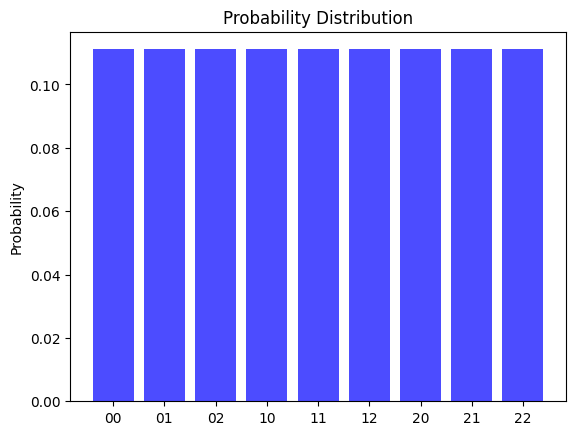

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

n = 2

# Define the quantum device with n+1 qutrits
dev = qml.device("default.qutrit", wires=n+1)

# CNOT gate for qutrits
cnot_qutrit = np.array     ([[1, 0, 0, 0, 0, 0, 0, 0, 0],
                             [0, 1, 0, 0, 0, 0, 0, 0, 0],
                             [0, 0, 1, 0, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 0, 1],
                             [0, 0, 0, 0, 0, 0, 1, 0, 0],
                             [0, 0, 0, 0, 0, 0, 0, 1, 0],
                             [0, 0, 0, 0, 0, 1, 0, 0, 0],
                             [0, 0, 0, 1, 0, 0, 0, 0, 0],
                             [0, 0, 0, 0, 1, 0, 0, 0, 0]])

# Define the Deutsch-Jozsa algorithm in PennyLane
@qml.qnode(dev)
def dj_algorithm(case, n):
    # Set up the output qutrit
    qml.TShift(wires=n)
    qml.THadamard(wires=n)

    # Set up the input register
    for qutrit in range(n):
        qml.THadamard(wires=qutrit)

    # Append the oracle gate
    if case == "balanced":
        b = np.random.randint(1, 3**n)
        b_str = np.base_repr(b, base=3)

        for qutrit in range(len(b_str)):
            if (b_str[qutrit] == ('1')) or (b_str[qutrit] == ('2')):
                qml.TShift(wires=qutrit)

        for qutrit in range(n):
            qml.QutritUnitary(cnot_qutrit, wires = [qutrit, n])

        for qutrit in range(len(b_str)):
            if (b_str[qutrit] == ('1')) or (b_str[qutrit] == ('2')):
                qml.TShift(wires=qutrit)

    elif case == "constant":
        output = np.random.randint(2)
        if (output == 1) or (output == 2):
            qml.TShift(wires=n)

    # Perform H-gates again and measure
    for qutrit in range(n):
        qml.THadamard(wires=qutrit)

    return qml.probs(wires=range(n))

# Run the circuits
result = dj_algorithm('balanced', n)

# Displaying the probabilities
states = [''.join(str((i // (3 ** j)) % 3) for j in range(n - 1, -1, -1)) for i in range(3 ** n)]
plt.bar(states, result, color='blue', alpha=0.7)
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()

The output obtained is rather interesting, but even more abstract in the sense that it does not particularly reveal the nature of the oracle. Obtaining a superposition between states means that we cannot say with certainty if the function is constant or balanced.

## **Conclusion**

We were able to simulate the expected outcome when working with constant oracles. However, it turns out that Deutsch-Jozsa for qubits does not generalize as easily for qutrits when it comes to balanced functions. Running the simulation multiple times leads us to the same result repetitively implying that either it is impossible to identify a balanced function using the standard Deutsch-Jozsa algorithm for qubits that has been extended to qutrits, or a balanced case simply does not exist for qutrits and the function is neither constant nor balanced.

## **References**

https://github.com/filipecorrea/deutsch-jozsa/blob/master/deutsch-jozsa.ipynb

https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=2b8bbd69f4e682f6ce6ea7597961d26c5441f287

https://pennylane.ai/qml/demos/tutorial_qutrits_bernstein_vazirani/

https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm

https://www.iosrjournals.org/iosr-jap/papers/Vol10-issue6/Version-2/D1006021619.pdf